In [22]:
import pandas as pd
import util_mnist_reader as mnist_reader
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.optimizers import RMSprop, Adadelta, Adam
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train = X_train[5000:]
y_train = y_train[5000:]

X_val = X_train[:5000]
y_val = y_train[:5000]

#Normalization 
X_train = X_train/255.0
X_test = X_test/255.0

#Categorical data: Y(60000,)->(60000, 10)
y_train = np.array(pd.get_dummies(y_train))
y_val = np.array(pd.get_dummies(y_val))
#print(y_train.shape)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Y_pred = model.predict(X_test, batch_size=64)

y_train = np.argmax(y_train, axis=1)
#Y_pred = np.argmax(Y_pred, axis=1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 162us/step - loss: 0.7577 - categorical_accuracy: 0.7441 - val_loss: 0.8926 - val_categorical_accuracy: 0.7346cal_
Epoch 2/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.4617 - categorical_accuracy: 0.8321 - val_loss: 0.5249 - val_categorical_accuracy: 0.8208
Epo

In [23]:
print(y_test)
y_test = to_categorical(y_test)
print(y_test)

[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
# print(confusion_matrix(y_test.argmax(axis=1), Y_pred.argmax(axis=1)))
# print(classification_report(y_test.argmax(axis=1), Y_pred.argmax(axis=1)))
print(confusion_matrix(y_test.argmax(axis=1),Y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

[[864   8  23  36   4   1  51   0  13   0]
 [  0 980   1  15   2   0   1   0   1   0]
 [ 17   6 855  10  63   0  46   0   3   0]
 [ 21  43  23 858  34   0  17   0   4   0]
 [  0   2 163  27 755   0  50   0   3   0]
 [  0   0   0   1   0 938   0  36   2  23]
 [178  11 127  44  65   0 557   0  18   0]
 [  0   0   0   0   0  33   0 934   0  33]
 [  3   1   3   6   3   2   2   3 977   0]
 [  0   0   0   0   0   4   1  37   0 958]]
             precision    recall  f1-score   support

          0       0.80      0.86      0.83      1000
          1       0.93      0.98      0.96      1000
          2       0.72      0.85      0.78      1000
          3       0.86      0.86      0.86      1000
          4       0.82      0.76      0.78      1000
          5       0.96      0.94      0.95      1000
          6       0.77      0.56      0.65      1000
          7       0.92      0.93      0.93      1000
          8       0.96      0.98      0.97      1000
          9       0.94      0.96      

In [25]:
model.history.history.keys()

dict_keys(['val_loss', 'categorical_accuracy', 'val_categorical_accuracy', 'loss'])

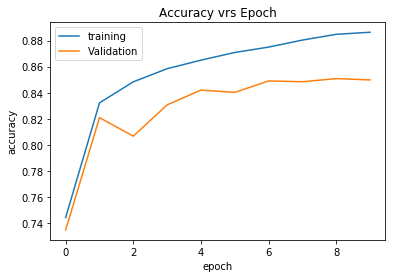

In [31]:
plt.plot(model.history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Accuracy vrs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'Validation'], loc='upper left')
plt.show()

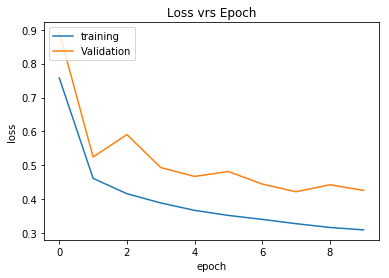

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vrs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'Validation'], loc='upper left')
plt.show()